A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import pandas as pd
 
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Representa la matriz de correlación, ¿los datos están correlacionados?

<AxesSubplot:>

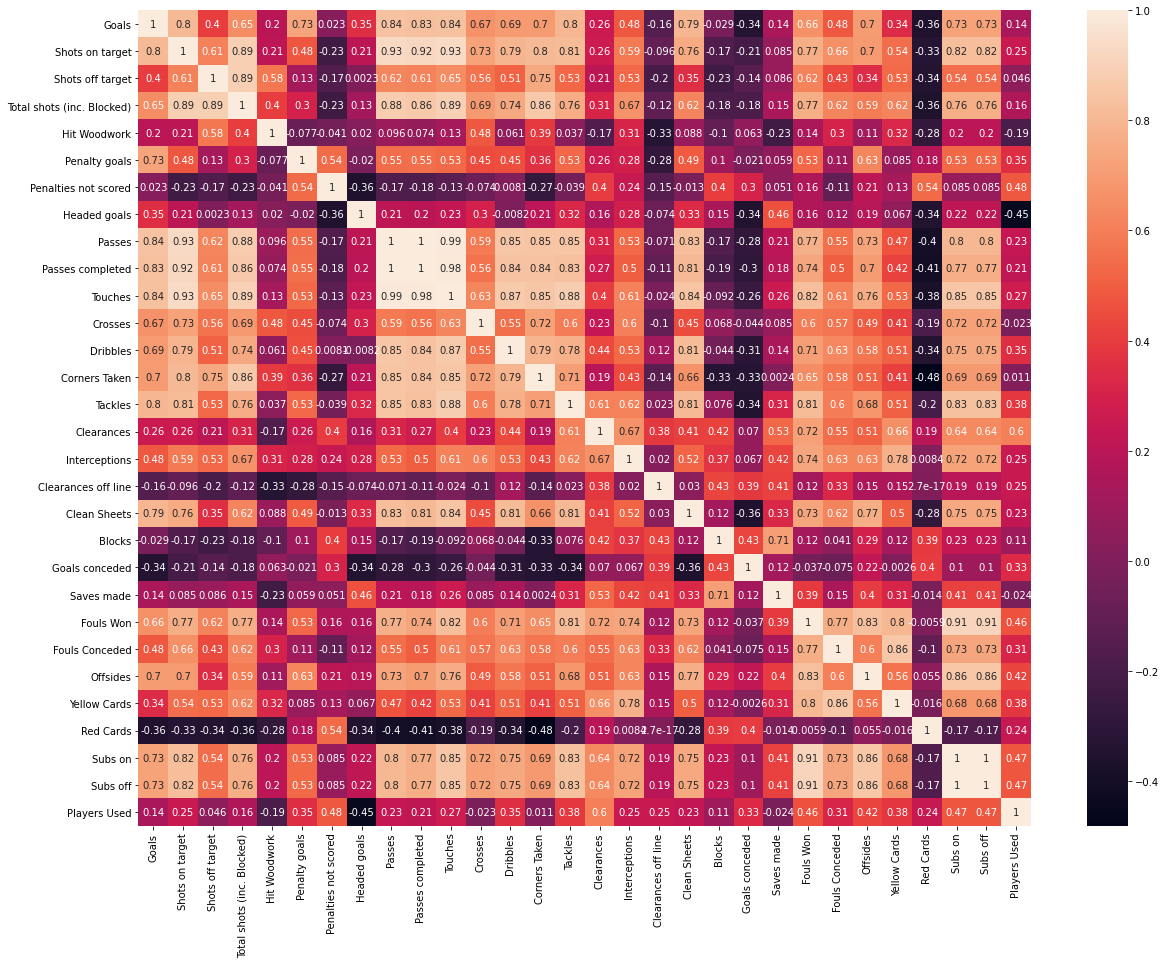

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

corr_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot = True)

¿Qué columnas están mejor correlacionadas?

In [3]:
corr_pairs = corr_matrix.unstack()

print(corr_pairs)

Goals         Goals                         1.000000
              Shots on target               0.804193
              Shots off target              0.403821
              Total shots (inc. Blocked)    0.650109
              Hit Woodwork                  0.200512
                                              ...   
Players Used  Yellow Cards                  0.377580
              Red Cards                     0.243599
              Subs on                       0.474938
              Subs off                      0.474938
              Players Used                  1.000000
Length: 900, dtype: float64


In [4]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


Yellow Cards  Tackles             0.505745
Tackles       Yellow Cards        0.505745
Dribbles      Yellow Cards        0.506126
Yellow Cards  Dribbles            0.506126
Dribbles      Shots off target    0.510942
                                    ...   
Red Cards     Red Cards           1.000000
Subs on       Subs on             1.000000
              Subs off            1.000000
Clearances    Clearances          1.000000
Players Used  Players Used        1.000000
Length: 384, dtype: float64


#### 2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:

df['Shooting Accuracy_%'] = df['Shooting Accuracy'].replace({'%':''}, regex=True)
df['Shooting Accuracy_%'] = df['Shooting Accuracy_%'].astype(float)


In [7]:
X = df['Shooting Accuracy_%']
X = np.array(X).reshape(-1, 1)
y = df['Goals']
y = np.array(y).reshape(-1, 1)

### Regresión Lineal

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
model = LinearRegression()

In [10]:

model.fit(X_train, y_train)
print(model.intercept_ , model.coef_)

[-0.54371953] [[0.13946767]]


In [11]:
print(f'MSE --> {mean_squared_error(y_test, model.predict(X_test))}\
    \nRMSE --> {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')


MSE --> 3.2205365083797415    
RMSE --> 1.7945853304815966


Text(0.5, 0, 'Goals')

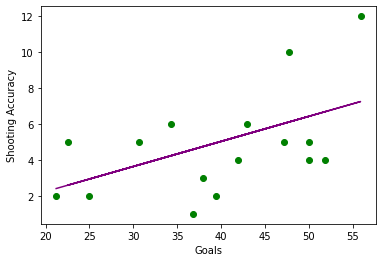

In [12]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel('Shooting Accuracy')
plt.xlabel('Goals')

### Regresión no Lineal con polinomio

In [13]:
X = df['Shooting Accuracy_%']
X = np.array(X).reshape(-1, 1)
y = df['Goals']
y = np.array(y).reshape(-1, 1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
degree = 3

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)



y_pred (12, 1)
Score: 0.6719361010793867
MAE: 1.3385966373815208
score test: -0.0126601809149538


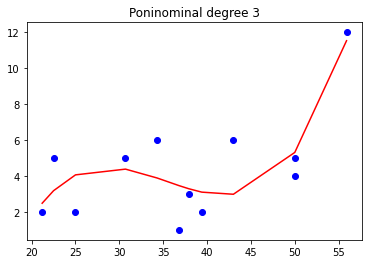

In [17]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))
#print("score entrenamiento:",model.score(X_poly, y_train))
print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
print("score test:",model.score(X_test, y_test))
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
#plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

### SVR 

In [18]:
from sklearn.svm import SVR

model.score: 0.1976288973507111


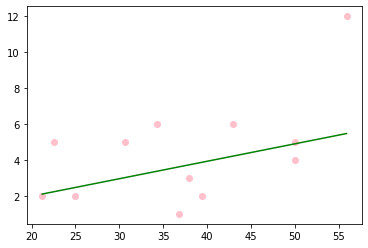

In [19]:
svr_rbf = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
model_svr = svr_rbf.fit(X_train, y_train.ravel())
y_prediction = model_svr.predict(X_train)
print("model.score:",model_svr.score(X_train, y_train))
plt.scatter(X_train, y_train, color='pink')
X_to_show, y_to_show = zip(*sorted(zip(X_train, y_prediction)))
plt.plot(X_to_show, y_to_show, color='green')
plt.show()



Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[[0.14363339]]


In [21]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
print(model.coef_)

[[0.14363339]]


In [22]:
model_svr = svr_rbf.fit(X_train, y_train.ravel())
print(model.coef_)

[[0.14363339]]


Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

In [24]:
#df1 = df(['% Goals-to-shots', 'Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles'])
list_columnas = df1._get_numeric_data().columns.tolist()
list_columnas

['Total shots (inc. Blocked)',
 'Passes',
 'Dribbles',
 'Corners Taken',
 'Shooting Accuracy_%']

In [25]:
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,Shooting Accuracy_%
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,81.3%,41,62,2,9,0,9,9,16,51.9
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,60.1%,53,73,8,7,0,11,11,19,41.9
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,66.7%,25,38,8,4,0,7,7,15,50.0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,88.1%,43,45,6,5,0,11,11,16,50.0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,54.6%,36,51,5,6,0,11,11,19,37.9
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,62.6%,63,49,12,4,0,15,15,17,47.8
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,65.1%,67,48,12,9,1,12,12,20,30.7
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,74.1%,101,89,16,16,0,18,18,19,43.0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,70.6%,35,30,3,5,0,7,7,15,25.0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,66.7%,48,56,3,7,1,7,7,17,39.4


In [49]:

df['% Goals-to-shots'] = df['% Goals-to-shots'].replace({'%':''}, regex=True)
df['% Goals-to-shots'] = df['% Goals-to-shots'].astype(float)

### Logistic regression

In [50]:
import numpy as np 

X = df.drop(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used', 'Shooting Accuracy_%'], axis=1)
#X = np.array(X).reshape(-1, 1)
y = df['Goals']
y = np.array(y).reshape(-1, 1)

In [28]:
predicciones = {'% Goals-to-shots': 40,
 'Total shots (inc. Blocked)': 102,
 'Passes': 5,
 'Dribbles': 82,
 'Corners Taken': 23}

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train = X_train.reshape(-1, 1)
#X_train = np.array(X_train).reshape(-1, 1)

In [53]:
model = LogisticRegression(max_iter=7000)
model.fit(X_train, y_train)

C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=7000)

In [54]:
y_pred = model.predict(X_test)
y_pred

array([5, 4, 5, 2], dtype=int64)

In [55]:
predicted_1 = model.predict([[40, 102, 5, 82, 23]]) 
print(f'Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: {predicted_1} goles')



Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: [1] goles


In [56]:
print(f"El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.\nPor este motivo para este modelo:\nEl score es: {model.score(X_test, y_test)}, \nEl score de entrenamiento es {model.score(X_train, y_train)}  y \nel accuracy_score es {accuracy_score(y_test, y_pred)}")

El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.
Por este motivo para este modelo:
El score es: 0.25, 
El score de entrenamiento es 1.0  y 
el accuracy_score es 0.25


### SVM

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt

In [44]:

X = df.drop(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'], axis=1)
#X = np.array(X).reshape(-1, 1)
y = df['Goals']
y = np.array(y).reshape(-1, 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [44]:
model_svc = SVC(kernel= "linear", C = 100, gamma = 0.1, random_state = 100) 
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
    
score_svc = accuracy_score(y_test, y_pred)

print("y_pred", y_pred.shape)
print("score:", score_svc)

y_pred (4,)
score: 0.25
C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [45]:
model_svc.score(X_train, y_train)

1.0

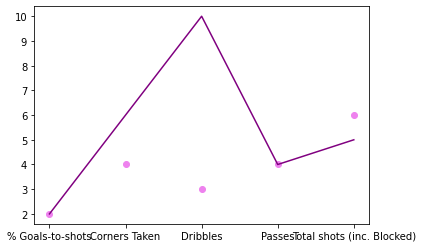

In [46]:
X_train_to_show_svc, y_train_to_show_svc = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show_svc, y_train_to_show_svc, color='violet')
X_train_to_show_svc, y_pred_svc = zip(*sorted(zip(X_train, y_pred_svc)))
plt.plot(X_train_to_show_svc, y_pred_svc, color='purple')
plt.show()

In [47]:
predicted_2 = model_svc.predict([[40, 102, 5, 82, 23]]) 
print(f'Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: {predicted_2} goles')

Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: [1] goles


### Random forest

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [52]:
X = df.drop(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'], axis=1)
#X = np.array(X).reshape(-1, 1)
y = df['Goals']
y = np.array(y).reshape(-1, 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

ipykernel_launcher:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [60]:
clf.score(X_train, y_train)

1.0

In [56]:

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2.5495097567963922


In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25


In [59]:
predicted_3 = clf.predict([[40, 102, 5, 82, 23]]) 
print(f'Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: {predicted_3} goles')

Con un 40% de goles por disparos, 102 tiros totales, 5 pases, 82 dribbles y 23 corners se marcarian: [5] goles
